*DAIA - Week 4 Assignment*

# Missing data in the Titanic dataset

## 1. Introduction

In this titanic example we will focus on how to find, label and deal with missing data. Make sure you have studies the study materials in Canvas about the various types of missing data and how to handle these kind of missing data.

Each instance in the dataset has the following form:

     "1","1st",1,"Allen, Miss Elisabeth Walton",29.0000,"Southampton","St Louis, MO","B-5","24160 L221","2","female"
     
Note that the raw data consists largely of strings. To apply machine learning algo's these strings have to be converted to numerical data first (at least the columns that are of interest)!

## 2. Data collection

Pandas is a Python module that works with the so-called dataframe concept (rows are observations, columns refer to the features). A dataframe is essentially a two-dimensional labeled data structure where
each column represent a feature and each row represents an observation.

More details, see: https://www.kaggle.com/c/titanic/details/getting-started-with-python-ii 

### 2.1. Load Dataset

Download the Titanic dataset (csv file) from Canvas, read it with Pandas into a dataframe. Show the first 5 rows.

In [63]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

print('numpy version:', np.__version__)
print('matplotlib version:', pd.__version__)

## To get you started...
df_titanic = pd.read_csv("./data/Titanic.csv")
df_titanic.columns =['passengers','pclass','survived','name','age','embarked','home/dest','room','ticket','boat','sex']
df_titanic

numpy version: 1.21.5
matplotlib version: 1.4.4


,passengers,pclass,survived,name,age,embarked,home/dest,room,ticket,boat,sex
0,1,1st,1,"Allen, Miss Elisabeth Walton",29.0000,Southampton,"St Louis, MO",B-5,24160 L221,2,female
1,2,1st,0,"Allison, Miss Helen Loraine",2.0000,Southampton,"Montreal, PQ / Chesterville, ON",C26,NaN,NaN,female
2,3,1st,0,"Allison, Mr Hudson Joshua Creighton",30.0000,Southampton,"Montreal, PQ / Chesterville, ON",C26,NaN,-135,male
3,4,1st,0,"Allison, Mrs Hudson J.C. (Bessie Waldo Daniels)",25.0000,Southampton,"Montreal, PQ / Chesterville, ON",C26,NaN,NaN,female
4,5,1st,1,"Allison, Master Hudson Trevor",0.9167,Southampton,"Montreal, PQ / Chesterville, ON",C22,NaN,11,male
...,...,...,...,...,...,...,...,...,...,...,...
1308,1309,3rd,0,"Zakarian, Mr Artun",NaN,NaN,NaN,NaN,NaN,NaN,male
1309,1310,3rd,0,"Zakarian, Mr Maprieder",NaN,NaN,NaN,NaN,NaN,NaN,male
1310,1311,3rd,0,"Zenn, Mr Philip",NaN,NaN,NaN,NaN,NaN,NaN,male
1311,1312,3rd,0,"Zievens, Rene",NaN,NaN,NaN,NaN,NaN,NaN,female


## 3.  Data understanding

You can examine the datatypes and some general (statistical) information about the dataset. See if you can already see something odd or striking, which indicates missing data.

In [64]:
df_titanic.dtypes

## Why is it good to first check the datatypes, before examining the columns or values for missing data?

## Your answer (and explanation):
### Als je de datatypes checkt, zie je meteen of er iets niet klopt. Bijvoorbeeld dat de leeftijd een float is, terwijl het een integer zou moeten zijn. Dit kan erop wijzen dat er missende waarden zijn. Verder zou je al bepaalde methode van het invullen van de missende waarden kunnen kiezen op basis van de type data. Bijvoorbeeld als je een gemiddelde van de leeftijden wilt berekenen, dan moet je de leeftijd wel als integer hebben. Als je de leeftijd als float hebt, dan wordt het gemiddelde ook een float, terwijl je een integer wilt hebben.

passengers      int64
pclass         object
survived        int64
name           object
age           float64
embarked       object
home/dest      object
room           object
ticket         object
boat           object
sex            object
dtype: object

Which columns contain missing values? You should find at least 3 (4 is better ;) ). 

In [65]:
## Your code and comments here...
df_titanic.isnull().sum() # This method shows the number of missing values per column

# As you can see below there are 6 columns with missing values

passengers       0
pclass           0
survived         0
name             0
age            680
embarked       492
home/dest      559
room          1236
ticket        1244
boat           966
sex              0
dtype: int64

Next step is to examine and explain *why* these values are missing. Remember MCAR, MAR, M(C)NAR... Don't forget to use visualization (histograms might be useful) as well to investigate or explain this.

## 1. Introduction

In this titanic example we will focus on how to find, label and deal with missing data. Make sure you have studies the study materials in Canvas about the various types of missing data and how to handle these kind of missing data.

Each instance in the dataset has the following form:

     "1","1st",1,"Allen, Miss Elisabeth Walton",29.0000,"Southampton","St Louis, MO","B-5","24160 L221","2","female"

Note that the raw data consists largely of strings. To apply machine learning algo's these strings have to be converted to numerical data first (at least the columns that are of interest)!

## 2. Data collection

Pandas is a Python module that works with the so-called dataframe concept (rows are observations, columns refer to the features). A dataframe is essentially a two-dimensional labeled data structure where
each column represent a feature and each row represents an observation.

More details, see: https://www.kaggle.com/c/titanic/details/getting-started-with-python-ii

### 2.1. Load Dataset

Download the Titanic dataset (csv file) from Canvas, read it with Pandas into a dataframe. Show the first 5 rows.

In [66]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

print('numpy version:', np.__version__)
print('matplotlib version:', pd.__version__)

## To get you started...
df_titanic = pd.read_csv("./data/Titanic.csv")
df_titanic.columns =['passengers','pclass','survived','name','age','embarked','home/dest','room','ticket','boat','sex']
df_titanic

numpy version: 1.21.5
matplotlib version: 1.4.4


,passengers,pclass,survived,name,age,embarked,home/dest,room,ticket,boat,sex
0,1,1st,1,"Allen, Miss Elisabeth Walton",29.0000,Southampton,"St Louis, MO",B-5,24160 L221,2,female
1,2,1st,0,"Allison, Miss Helen Loraine",2.0000,Southampton,"Montreal, PQ / Chesterville, ON",C26,NaN,NaN,female
2,3,1st,0,"Allison, Mr Hudson Joshua Creighton",30.0000,Southampton,"Montreal, PQ / Chesterville, ON",C26,NaN,-135,male
3,4,1st,0,"Allison, Mrs Hudson J.C. (Bessie Waldo Daniels)",25.0000,Southampton,"Montreal, PQ / Chesterville, ON",C26,NaN,NaN,female
4,5,1st,1,"Allison, Master Hudson Trevor",0.9167,Southampton,"Montreal, PQ / Chesterville, ON",C22,NaN,11,male
...,...,...,...,...,...,...,...,...,...,...,...
1308,1309,3rd,0,"Zakarian, Mr Artun",NaN,NaN,NaN,NaN,NaN,NaN,male
1309,1310,3rd,0,"Zakarian, Mr Maprieder",NaN,NaN,NaN,NaN,NaN,NaN,male
1310,1311,3rd,0,"Zenn, Mr Philip",NaN,NaN,NaN,NaN,NaN,NaN,male
1311,1312,3rd,0,"Zievens, Rene",NaN,NaN,NaN,NaN,NaN,NaN,female


## 3.  Data understanding

You can examine the datatypes and some general (statistical) information about the dataset. See if you can already see something odd or striking, which indicates missing data.

In [67]:
df_titanic.dtypes

## Why is it good to first check the datatypes, before examining the columns or values for missing data?

## Your answer (and explanation):
### Als je de datatypes checkt, zie je meteen of er iets niet klopt. Bijvoorbeeld dat de leeftijd een float is, terwijl het een integer zou moeten zijn. Dit kan erop wijzen dat er missende waarden zijn. Verder zou je al bepaalde methode van het invullen van de missende waarden kunnen kiezen op basis van de type data. Bijvoorbeeld als je een gemiddelde van de leeftijden wilt berekenen, dan moet je de leeftijd wel als integer hebben. Als je de leeftijd als float hebt, dan wordt het gemiddelde ook een float, terwijl je een integer wilt hebben.

passengers      int64
pclass         object
survived        int64
name           object
age           float64
embarked       object
home/dest      object
room           object
ticket         object
boat           object
sex            object
dtype: object

Which columns contain missing values? You should find at least 3 (4 is better ;) ).

In [68]:
## Your code and comments here...
df_titanic.isnull().sum() # This method shows the number of missing values per column

# As you can see below there are 6 columns with missing values

passengers       0
pclass           0
survived         0
name             0
age            680
embarked       492
home/dest      559
room          1236
ticket        1244
boat           966
sex              0
dtype: int64

Next step is to examine and explain *why* these values are missing. Remember MCAR, MAR, M(C)NAR... Don't forget to use visualization (histograms might be useful) as well to investigate or explain this.

In [69]:
def plot_hist_of_na(df, col):
  #Plots histograms for every column of 'df' based on the missing values in 'col'
  na = df[df[col].isna()] # get only where values are NaN #
  fig, axs = plt.subplots(nrows=len(na.columns), ncols=1, figsize=(20, 40))
  plt.suptitle(f"Histograms for missing values of {col}")
  i = 0
  for col in na.columns:
   axs[i].set_title(col)
   axs[i].hist(na[col].dropna(), bins = 300, rwidth=50)
   i += 1


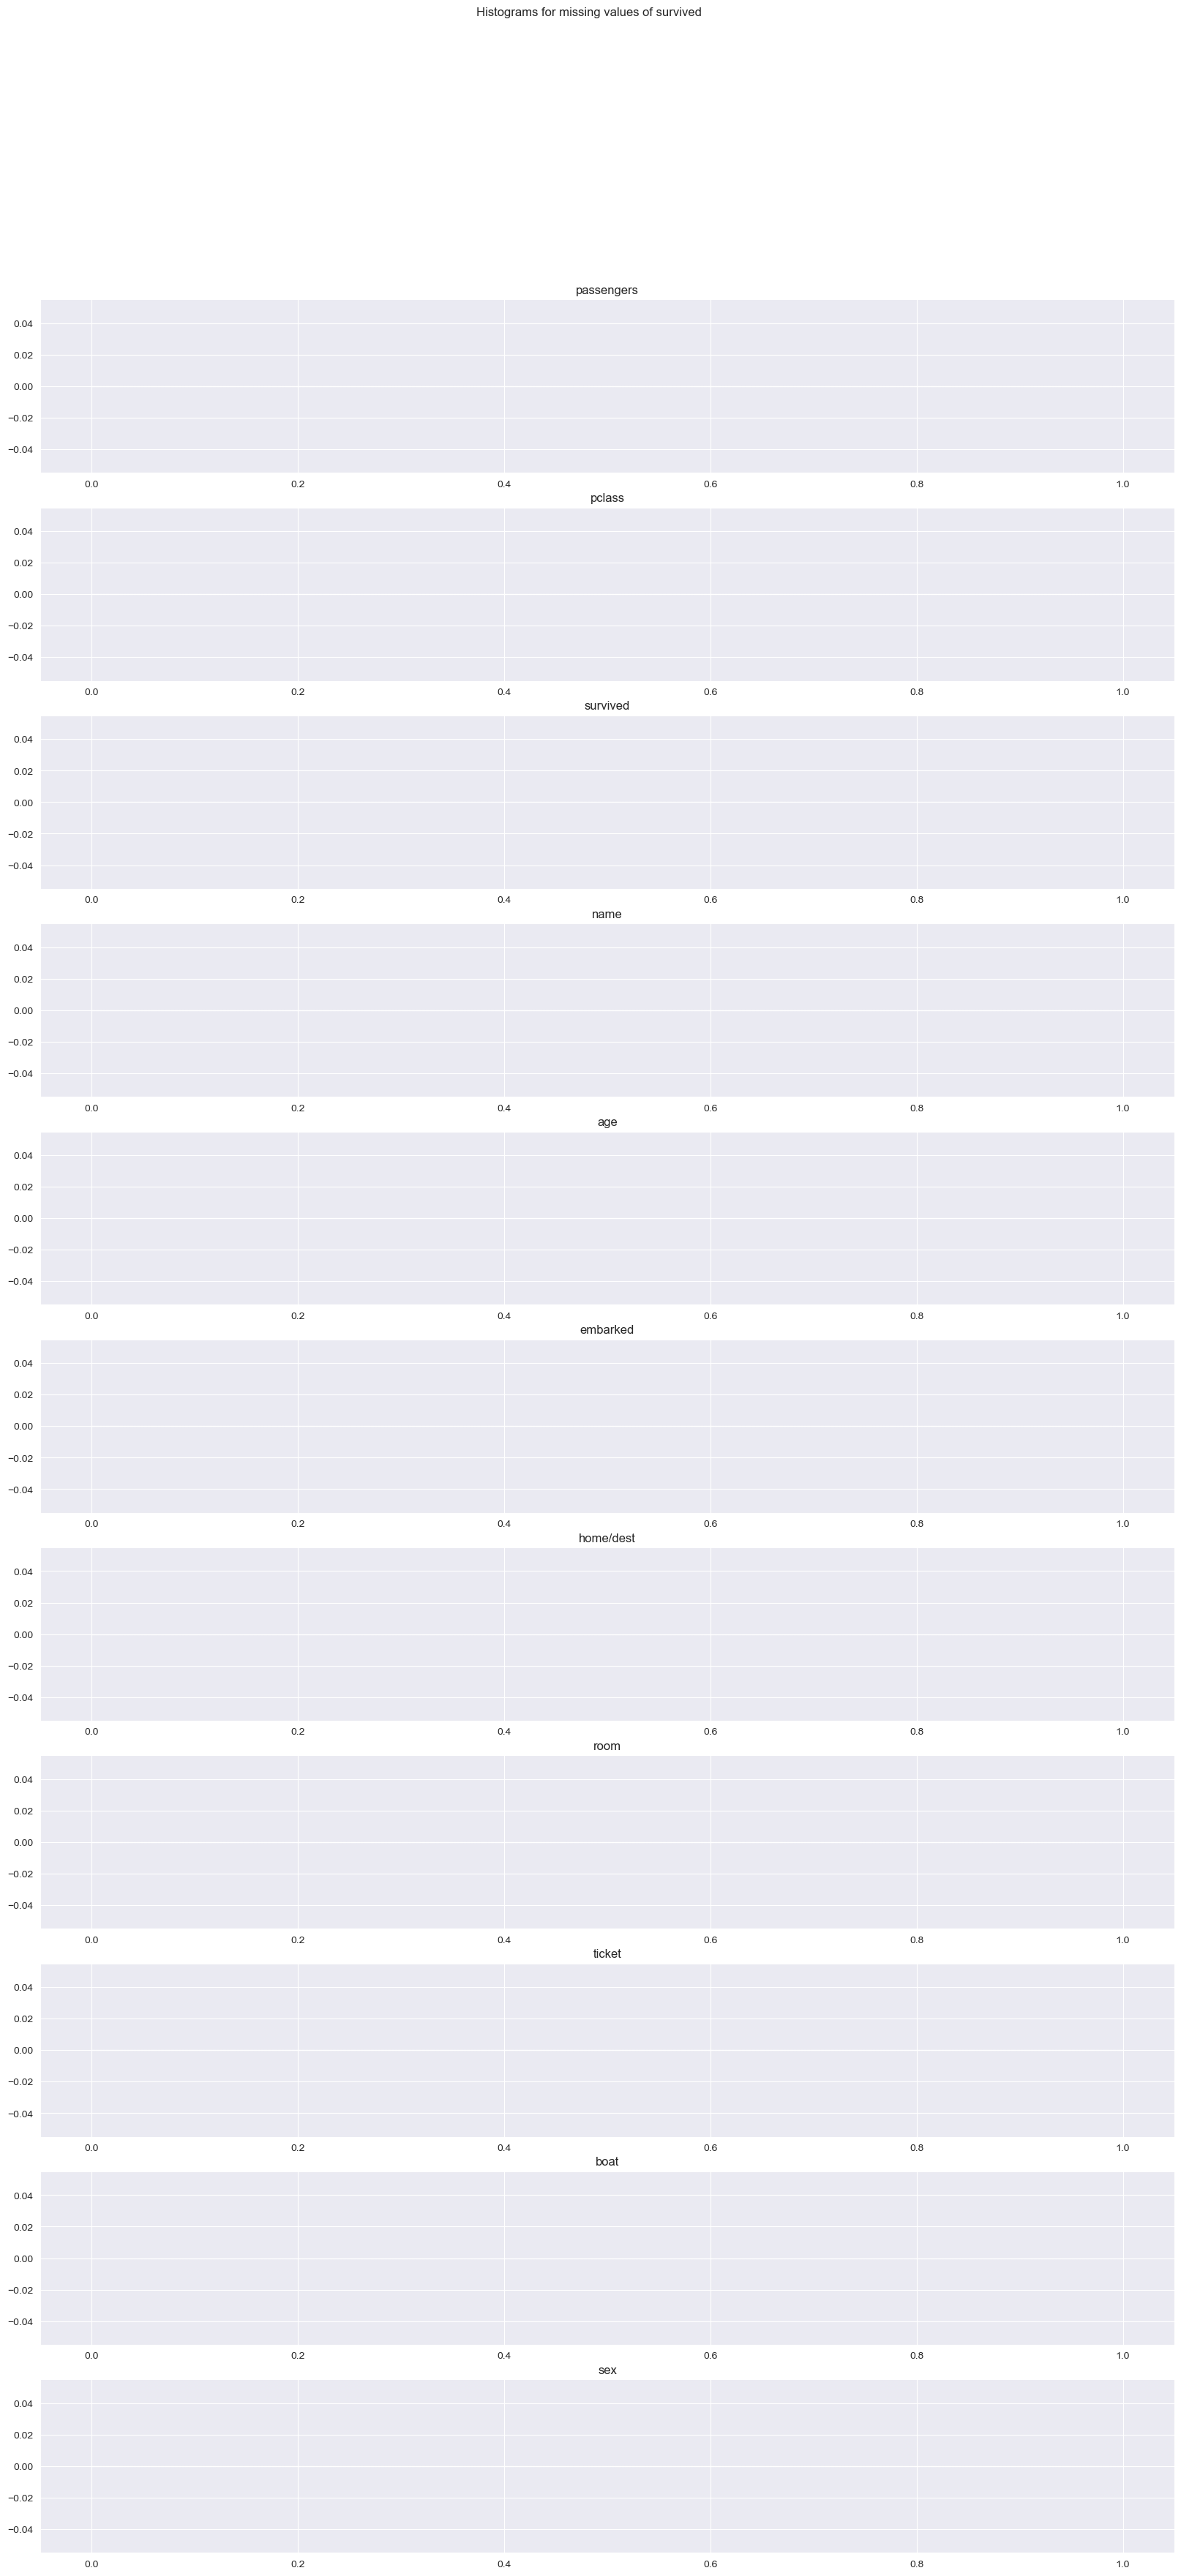

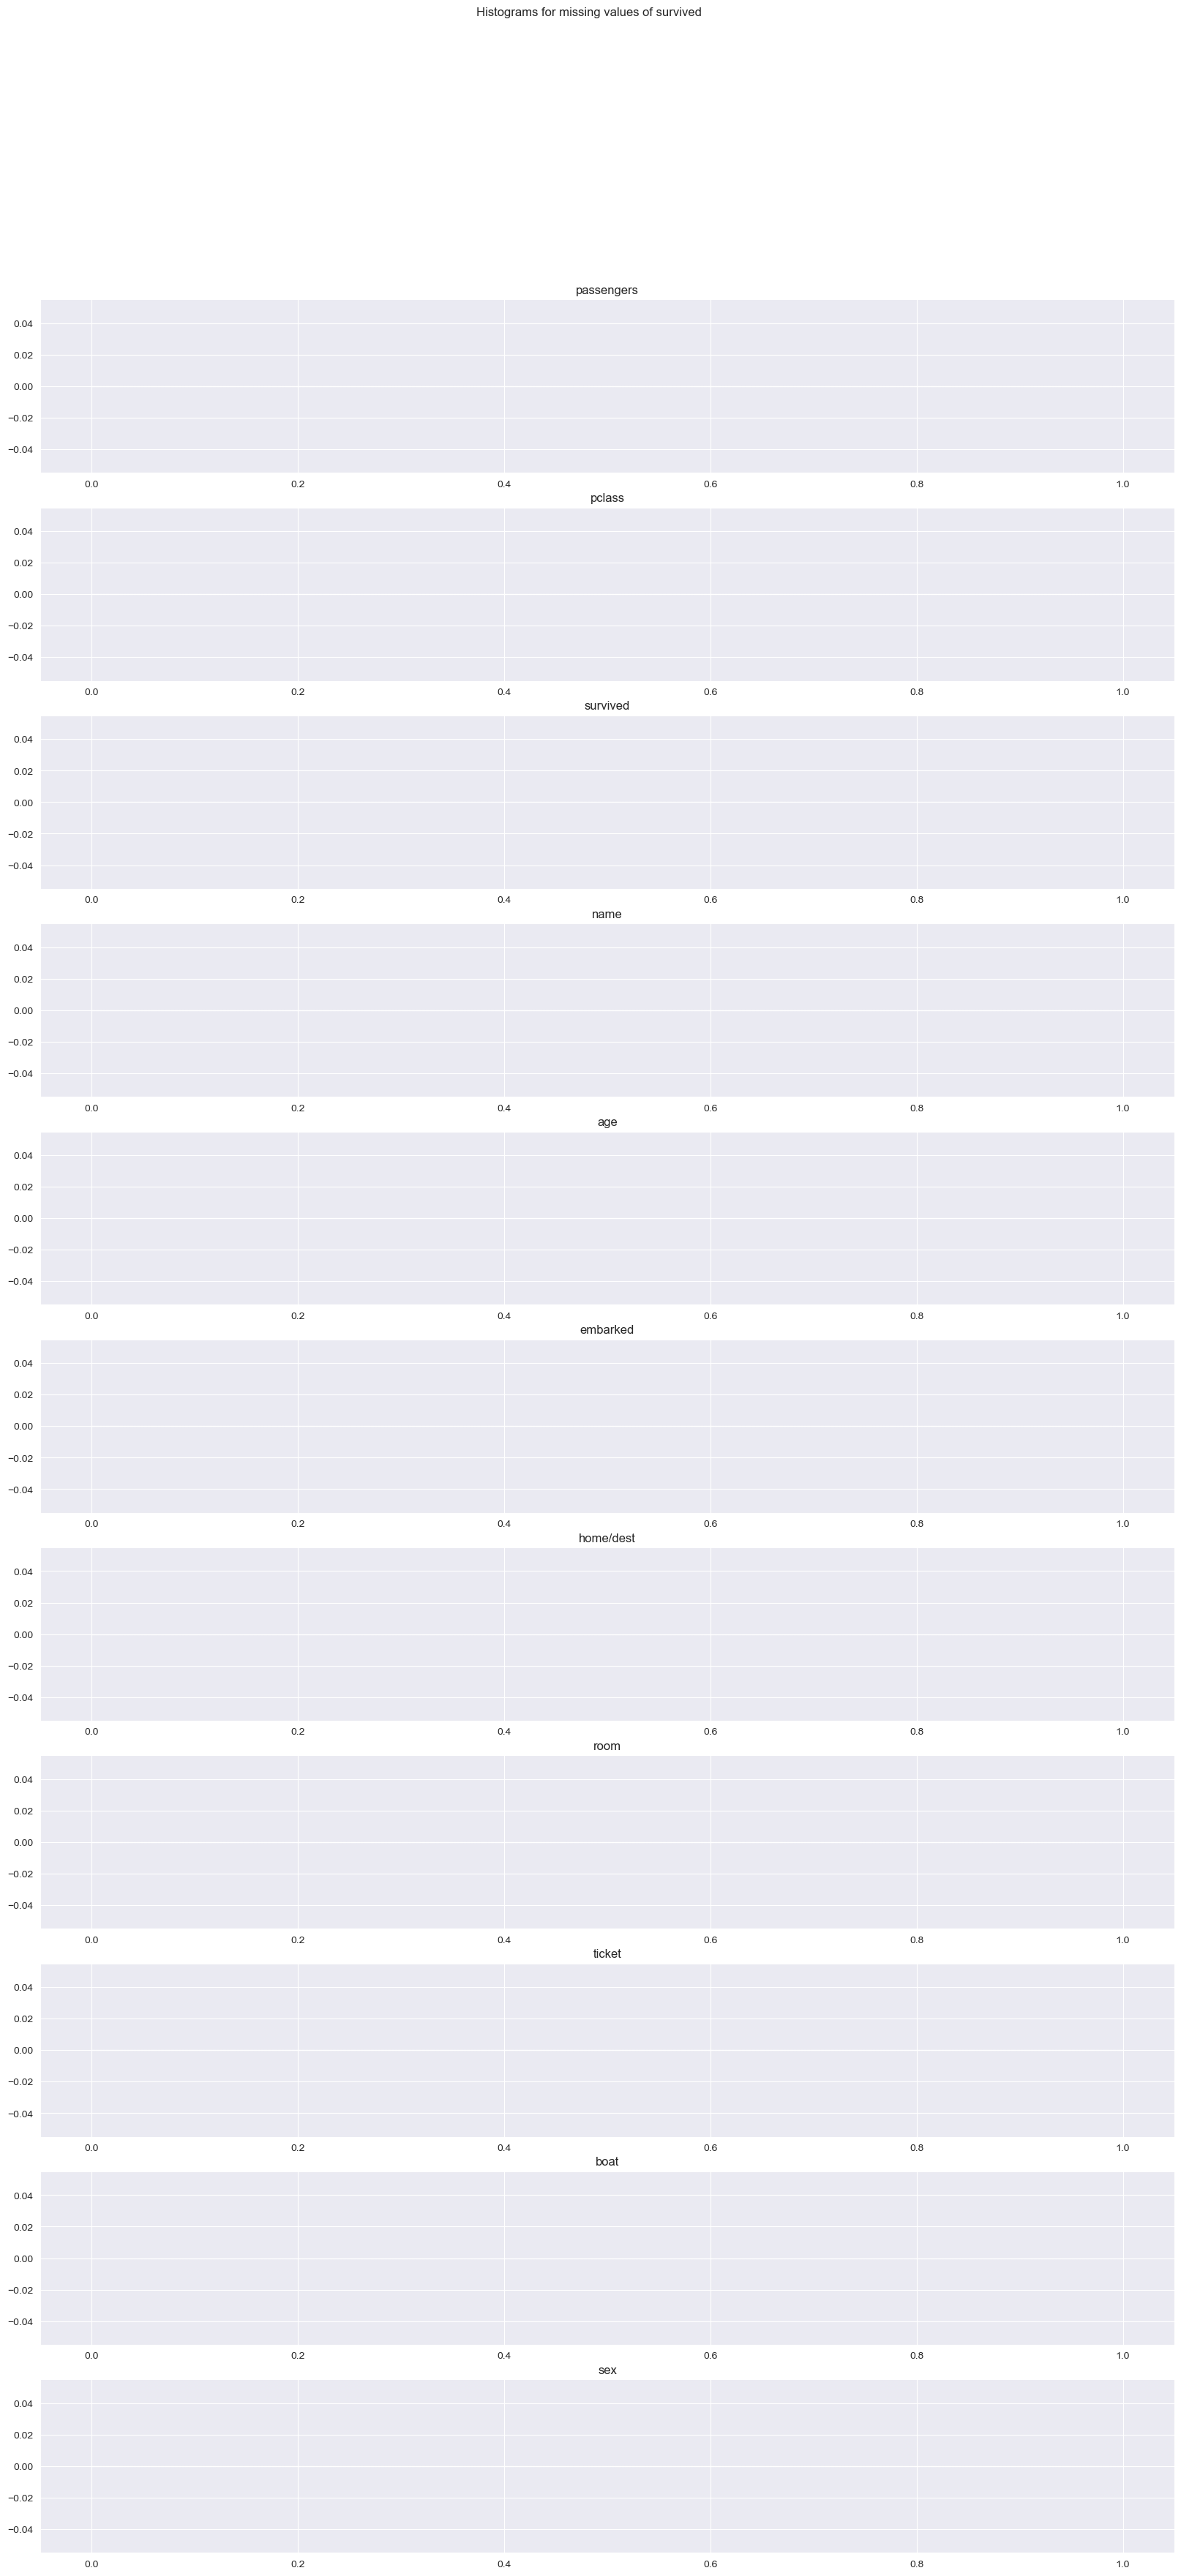

In [70]:
plot_hist_of_na(df_titanic, 'survived')

## 4. Data Preparation

### 4.1. Deal with Missing Values

You have found some (indications, clues for) missing data. Under 'Data Understanding' you have looked for reasons why and perhaps also found some relationships with other values or features. That helps you to 'label' the type of missing data. Now it's time to deal with the missing values. It could be a requirement of the  machine learning model that it needs a complete set of values for a feature. There are several options as you know. Deleting rows can reduce missing values, but it also reduces the total amount of data... Another way is to fill  it in with guesses. You will be introducing some noise into a model, but if you canmake reasonable guesses, some of them should be close to the historical truth (whatever it was...), and the overall predictive power of the model might still make a better model than before.

#### Look at the features with missing data and explain and apply a suitable method to deal with these missing values...

## 4. Data Preparation

### 4.1. Deal with Missing Values

You have found some (indications, clues for) missing data. Under 'Data Understanding' you have looked for reasons why and perhaps also found some relationships with other values or features. That helps you to 'label' the type of missing data. Now it's time to deal with the missing values. It could be a requirement of the  machine learning model that it needs a complete set of values for a feature. There are several options as you know. Deleting rows can reduce missing values, but it also reduces the total amount of data... Another way is to fill  it in with guesses. You will be introducing some noise into a model, but if you canmake reasonable guesses, some of them should be close to the historical truth (whatever it was...), and the overall predictive power of the model might still make a better model than before. 

#### Look at the features with missing data and explain and apply a suitable method to deal with these missing values...